In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import cross_val_score

In [2]:
data = pd.read_csv('ushape.csv', names=['X1', 'X2', 'Y'])
data.head()

,X1,X2,Y
0,0.031595,0.986988,0.0
1,2.115098,-0.046244,1.0
2,0.882490,-0.075756,0.0
3,-0.055144,-0.037332,1.0
4,0.829545,-0.539321,1.0


In [3]:
X = data.iloc[:, [0,1]]
y = data.iloc[:, -1]

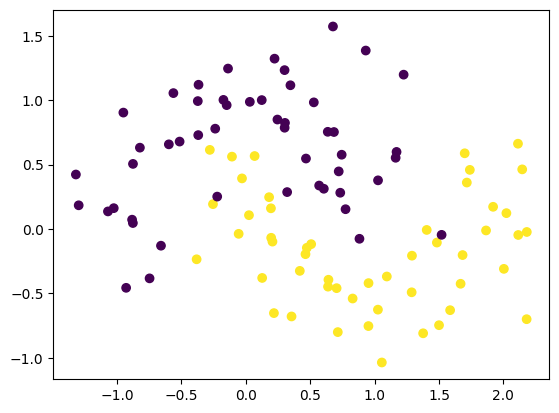

In [4]:
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=y)

Accuracy :  0.8300000000000001


/home/ree/python_venv/ML/lib64/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<Axes: >

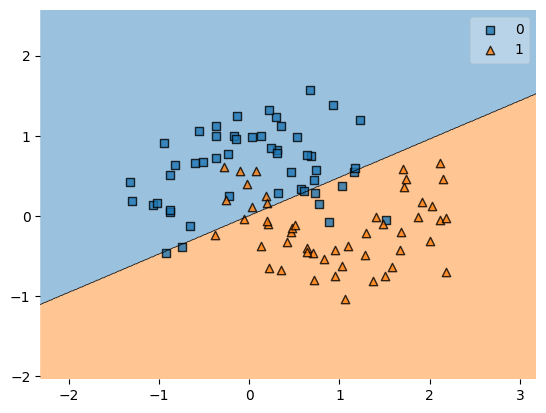

In [5]:
lgr = LogisticRegression()
lgr.fit(X, y)
print('Accuracy : ', np.mean(cross_val_score(lgr, X, y, scoring='accuracy', cv=10)))

plot_decision_regions(X.values, y.astype(int).values, lgr)

In [6]:
X.values[0]

array([0.03159499, 0.98698776])

In [7]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_trf = poly.fit_transform(X)

lgr_2 = LogisticRegression()
lgr_2.fit(X_trf, y)

print(np.mean(cross_val_score(lgr_2, X, y, scoring='accuracy', cv=10)))

0.8300000000000001


# Using Polynomial Features

In [8]:
# making the meshgrid and the input for the meshgrid

x_ = np.linspace(min(X.iloc[:,0])-1, max(X.iloc[:,0]+1), 500)    # for feature X1
y_ = np.linspace(min(X.iloc[:,1])-1, max(X.iloc[:,1]+1), 500)    # for feature X2

XX, YY = np.meshgrid(x_, y_)

input_X = np.concat((XX.reshape(-1,1), YY.reshape(-1,1)), axis=1)   
input_X

array([[-2.31850034, -2.03570207],
       [-2.30747856, -2.03570207],
       [-2.29645677, -2.03570207],
       ...,
       [ 3.15932811,  2.57189931],
       [ 3.1703499 ,  2.57189931],
       [ 3.18137168,  2.57189931]])

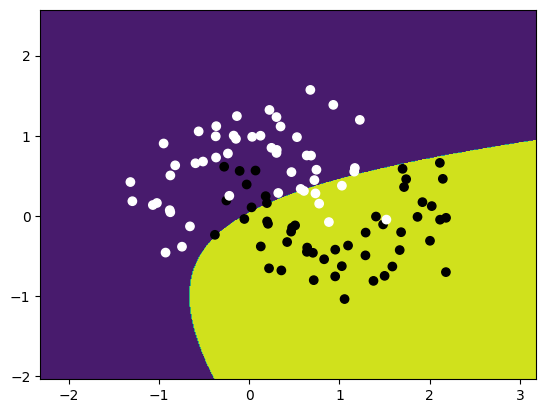

In [9]:
input_X_trf = poly.fit_transform(input_X)
y_plot = lgr_2.predict(input_X_trf)

Z = y_plot.reshape(XX.shape)
plt.contourf(XX, YY, Z)
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=y, cmap='binary')

## How we are creating input grid for all the points

In [10]:
x_ = np.array([1,2,3])
y_ = np.array([10,20,30])

XX, YY = np.meshgrid(x_, y_)

In [11]:
XX.flatten()

array([1, 2, 3, 1, 2, 3, 1, 2, 3])

In [12]:
XX, YY

(array([[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]]),
 array([[10, 10, 10],
        [20, 20, 20],
        [30, 30, 30]]))

In [13]:
np.concat((XX.reshape(-1,1), YY.reshape(-1,1)), axis=1)    # Will give all the combinations (representing all the points on the 2D axis)

array([[ 1, 10],
       [ 2, 10],
       [ 3, 10],
       [ 1, 20],
       [ 2, 20],
       [ 3, 20],
       [ 1, 30],
       [ 2, 30],
       [ 3, 30]])

In [14]:
# making a function of this 

def plot_boundaries(X, y, degree=1):

    clf = LogisticRegression()
    poly = PolynomialFeatures(degree=degree)

    X_trf = poly.fit_transform(X)
    clf.fit(X_trf, y)

    x_ = np.linspace(min(X.iloc[:,0])-1, max(X.iloc[:,0]+1), 500)    # for feature X1
    y_ = np.linspace(min(X.iloc[:,1])-1, max(X.iloc[:,1]+1), 500)    # for feature X2
    
    XX, YY = np.meshgrid(x_, y_)
    
    X_plot = np.concat((XX.reshape(-1,1), YY.reshape(-1,1)), axis=1)
    X_plot_trf = poly.fit_transform(X_plot)
    y_plot = clf.predict(X_plot_trf)
    
    Z = y_plot.reshape(XX.shape)
    plt.contourf(XX, YY, Z)
    plt.scatter(X.iloc[:,0], X.iloc[:,1], c=y, cmap='binary', s=15)

    print('Accuracy :', np.mean(cross_val_score(clf, X_trf, y, scoring='accuracy', cv=10)))

Accuracy : 0.9


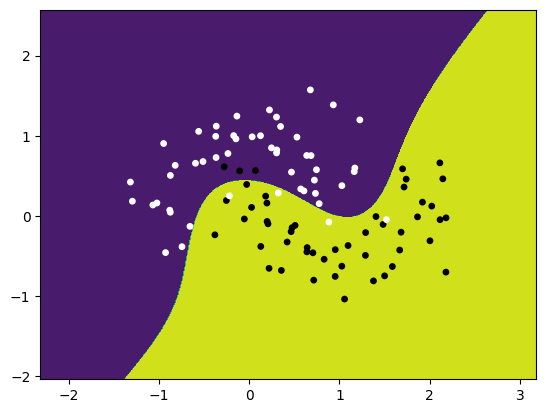

In [15]:
plot_boundaries(X, y, degree=5)

/home/ree/python_venv/ML/lib64/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ree/python_venv/ML/lib64/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

Accuracy : 0.8600000000000001


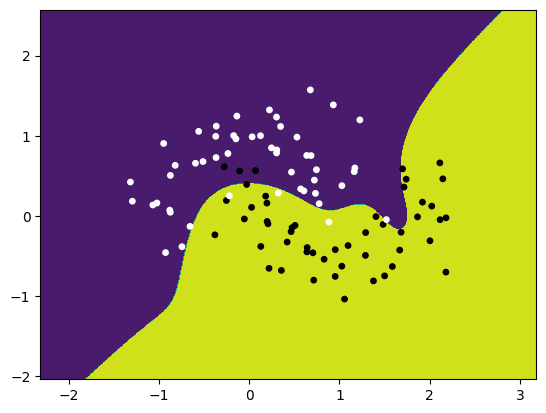

In [20]:
plot_boundaries(X, y, degree=15)